<a href="https://colab.research.google.com/github/AbhiramSakha/FMML_Project_and_Labs/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

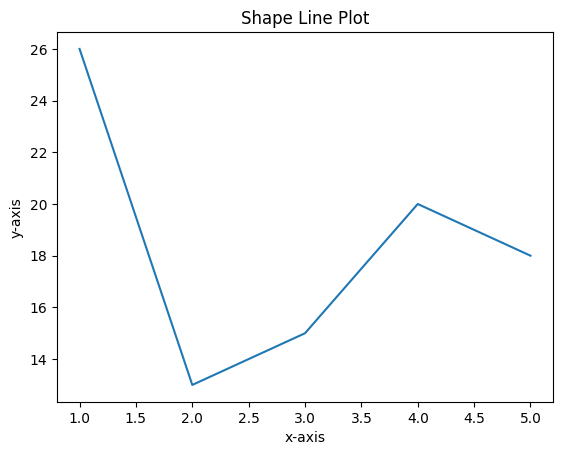

In [26]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[26,13,15,20,18]
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Shape Line Plot')
plt.show()

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [27]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-27-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


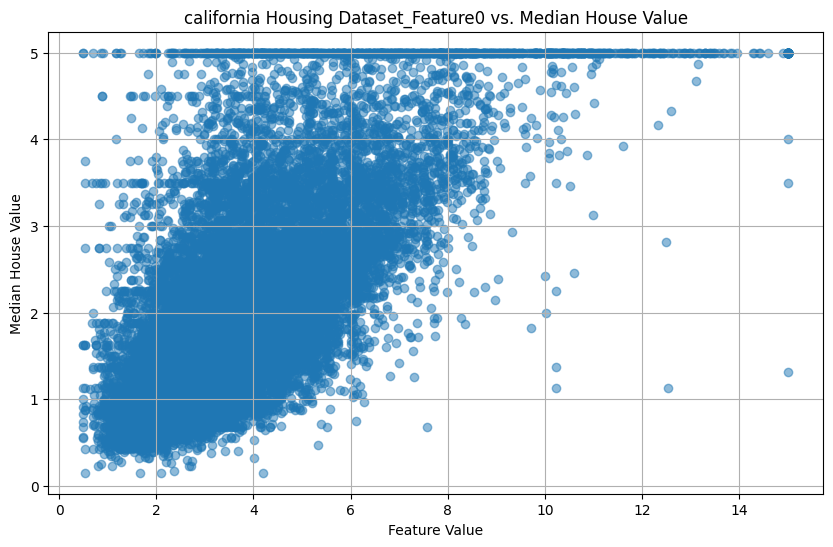

In [28]:
 import matplotlib.pyplot as plt
 from sklearn import datasets
 california_housing=datasets.fetch_california_housing()
 data=california_housing.data
 target=california_housing.target
 feature_index=0
 feature_data=data[:, feature_index]
 plt.figure(figsize=(10,6))
 plt.scatter(feature_data,target,alpha=0.5)
 plt.xlabel('Feature Value')
 plt.ylabel('Median House Value')
 plt.title(f'california Housing Dataset_Feature{feature_index} vs. Median House Value')
 plt.grid(True)
 plt.show()

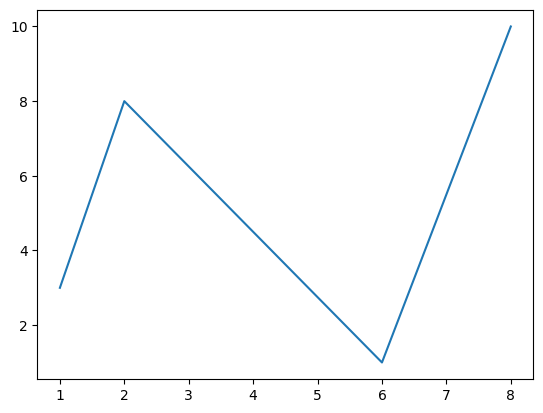

In [29]:
xpoints=np.array([1,2,6,8])
ypoints=np.array([3,8,1,10])
plt.plot(xpoints,ypoints)
plt.show()

In [30]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [31]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [32]:
def RandomClassifier(traindata, trainlabel, testdata):
  classes = np.unique(trainlabel)
  rints = rng.variables(low=A, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [33]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [34]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [35]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [36]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(100).reshape(-1, 1), np.arange(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_test,y_test,y_test

(array([[55],
        [88],
        [26],
        [42],
        [69],
        [15],
        [40],
        [96],
        [ 9],
        [72],
        [11],
        [47],
        [85],
        [28],
        [93],
        [ 5],
        [66],
        [65],
        [35],
        [16],
        [49],
        [34],
        [ 7],
        [95],
        [27],
        [19],
        [81],
        [25],
        [62],
        [13],
        [24],
        [ 3],
        [17],
        [38],
        [ 8],
        [78],
        [ 6],
        [64],
        [36],
        [89],
        [56],
        [99],
        [54],
        [43],
        [50],
        [67],
        [46],
        [68],
        [61],
        [97],
        [79],
        [41],
        [58],
        [48],
        [98],
        [57],
        [75],
        [32],
        [94],
        [59],
        [63],
        [84],
        [37],
        [29],
        [ 1],
        [52],
        [21],
        [ 2],
        [23],
        [87],
        [91],
      

What is the accuracy of our classifiers on the train dataset?

In [38]:
import numpy as np

def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.randint(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

### Tt how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You canry it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affec note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1A.* There is no effect for the accuracy if we increase the percentege of validation set.
*If we reduce the percentage of validation set we don't get the best accuracy.

2A.* The training set should not small.
*If the validation set is too small, then the evaluation metrices like accuracy, precision, recall and F score will have large varience and will not lead to proper tanning of model.

3A.* IN general putting 80% of data in training set 10% in the validation set, and 10& in the test set is a good to start.
* Train set depends on factors sech as structure of model, dimension of data.

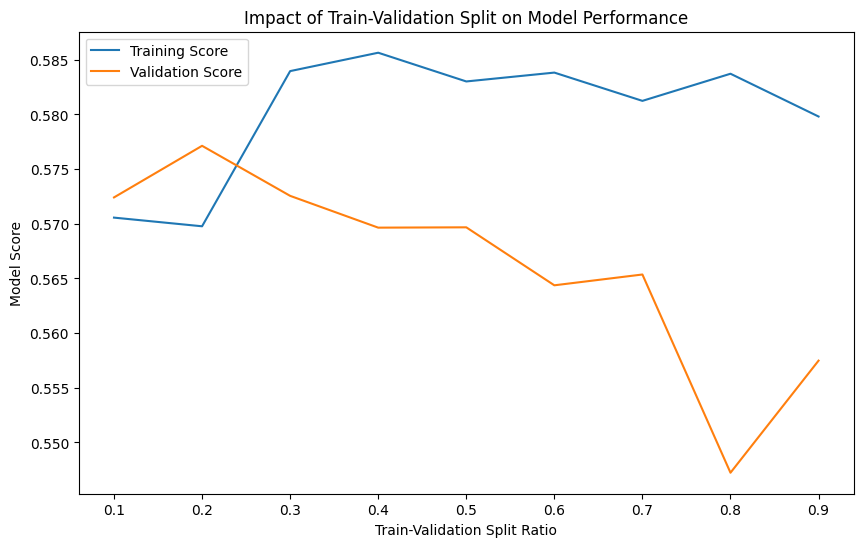

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Replace with your model

# Define a range of split ratios to experiment with
split_ratios = np.arange(0.1, 1.0, 0.1)  # e.g., 10% to 90% for training

# Lists to store results
train_scores = []
val_scores = []

# Experiment for different split ratios
for split_ratio in split_ratios:
    # Split the data using the current ratio
    train_data, val_data, train_target, val_target = train_test_split(
        dataset.data, dataset.target, test_size=(1 - split_ratio), random_state=42
    )

    # Train your model (replace with your model)
    model = LinearRegression()
    model.fit(train_data, train_target)

    # Compute training and validation scores (replace with your evaluation metric)
    train_score = model.score(train_data, train_target)
    val_score = model.score(val_data, val_target)

    # Append the performance metrics to train_scores and val_scores
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_ratios, train_scores, label='Training Score')
plt.plot(split_ratios, val_scores, label='Validation Score')
plt.xlabel('Train-Validation Split Ratio')
plt.ylabel('Model Score')
plt.legend()
plt.title('Impact of Train-Validation Split on Model Performance')
plt.show()


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [40]:
import numpy as np

# Initialize the random number generator
rng = np.random.default_rng()

# Your code for generating random labels using the random classifier
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.choice(classes, size=len(testdata))
    predlabel = classes[rints]
    return predlabel

# Rest of your code
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is", valAccuracy)


Validation accuracy using random classifier is 0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [41]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [42]:
np.broadcast_shapes((1, 2), (3, 1))
(3, 2)

np.broadcast_shapes(2, (3, 1))
(3, 2)

np.broadcast_shapes((6, 7), (5, 6, 1), (7,), (5, 1, 7))
(5, 6, 7)

(5, 6, 7)

In [43]:
import numpy as np

rng = np.random.default_rng()


num_runs = 10

val_accuracies = []


def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.choice(classes, size=len(testdata))
    predlabel = classes[rints]
    return predlabel


for run in range(num_runs):

    valpred = RandomClassifier(traindata, trainlabel, valdata)


    valAccuracy = Accuracy(vallabel, valpred)
    val_accuracies.append(valAccuracy)

    print(f"Run {run+1}: Validation accuracy using random classifier is {valAccuracy}")



Run 1: Validation accuracy using random classifier is 0.16642441860465115
Run 2: Validation accuracy using random classifier is 0.16448643410852712
Run 3: Validation accuracy using random classifier is 0.16424418604651161
Run 4: Validation accuracy using random classifier is 0.16279069767441862
Run 5: Validation accuracy using random classifier is 0.15818798449612403
Run 6: Validation accuracy using random classifier is 0.16666666666666666
Run 7: Validation accuracy using random classifier is 0.1610949612403101
Run 8: Validation accuracy using random classifier is 0.16618217054263565
Run 9: Validation accuracy using random classifier is 0.16448643410852712
Run 10: Validation accuracy using random classifier is 0.1753875968992248


In [44]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split

def cross_validate(model, data, labels, num_splits=5):
    """
    Perform cross-validation to estimate model performance.

    Args:
    - model: The machine learning model to evaluate.
    - data: The feature data.
    - labels: The corresponding labels.
    - num_splits: The number of cross-validation splits to perform.

    Returns:
    - The average validation accuracy across all splits.
    """
    validation_accuracies = []

    for _ in range(num_splits):

        train_data, val_data, train_labels, val_labels = train_test_split(
            data, labels, test_size=1/num_splits, random_state=None
        )


        model.fit(train_data, train_labels)


        val_accuracy = model.score(val_data, val_labels)


        validation_accuracies.append(val_accuracy)


    avg_val_accuracy = np.mean(validation_accuracies)

    return avg_val_accuracy



In [46]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1A.You averaging the validation accuracy acrss multiple splits give more consistent results.

2A.* It's useful for building more accurate machine learning models and eveluating how will they work on an independent test dataset.


*Cross validation is easy to understsand and implement making it to go to method for comparing the predictive capabilities of different models and choosing best.

3A.There is no effect of the number of iterations on estimate. Yes, we get a better estimate with higher iteration

4A.Yes we can deal with a very small train dataset or validation dataset by increasing the iterations.
Overfitting: Too many iterations can make the model memorize data instead of learning patterns, causing it to perform poorly on new data (overfitting).

Diminishing Returns: There's an optimal point where more iterations won't significantly improve validation performance.

Computational Resources: It can be computationally expensive for deep models and may not be feasible with limited resources.

Use Techniques: Instead of just more iterations, use techniques like data augmentation, regularization, transfer learning, and cross-validation to improve model performance on a small dataset.